In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#separation of the dataset for training and testing
from sklearn.model_selection import train_test_split 
#importing the algorithm for modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#now determinig the accuracy for the model
from sklearn.metrics import accuracy_score 


Data collection and preprocessing 

In [3]:
#using the variable hd_data for accessing 
hd_data=pd.read_csv('heart_disease_data.csv')

In [4]:
hd_data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
hd_data.shape


(303, 14)

In [6]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking the missing value
hd_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistics
hd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
hd_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
age_cp_mean=hd_data.groupby('age')['cp'].mean()

In [11]:
ages=age_cp_mean.index
cp_means=age_cp_mean.values

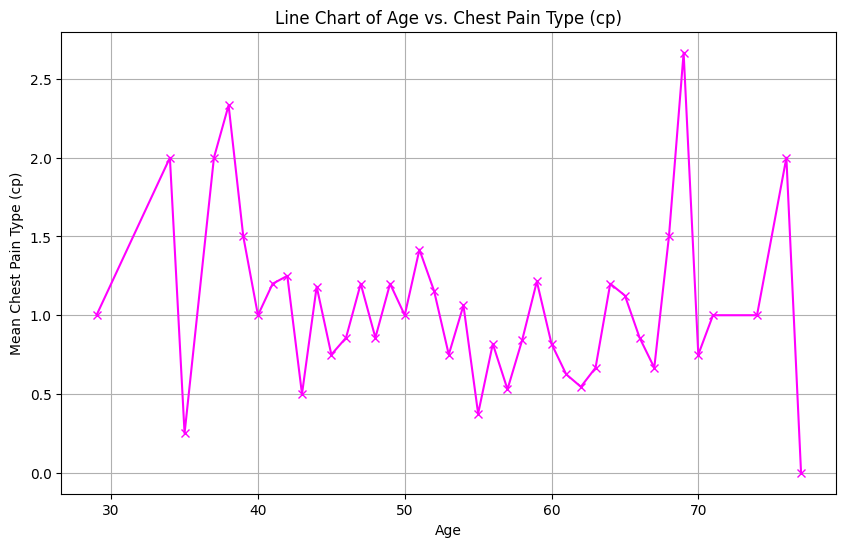

In [12]:
plt.figure(figsize=(10,6))
plt.plot(ages, cp_means, marker='x', linestyle='-',color='magenta')
plt.title('Line Chart of Age vs. Chest Pain Type (cp)')
plt.xlabel('Age')
plt.ylabel('Mean Chest Pain Type (cp)')
plt.grid(True)

In [13]:
plt.show()

In [14]:
corr_matrix=hd_data.corr()


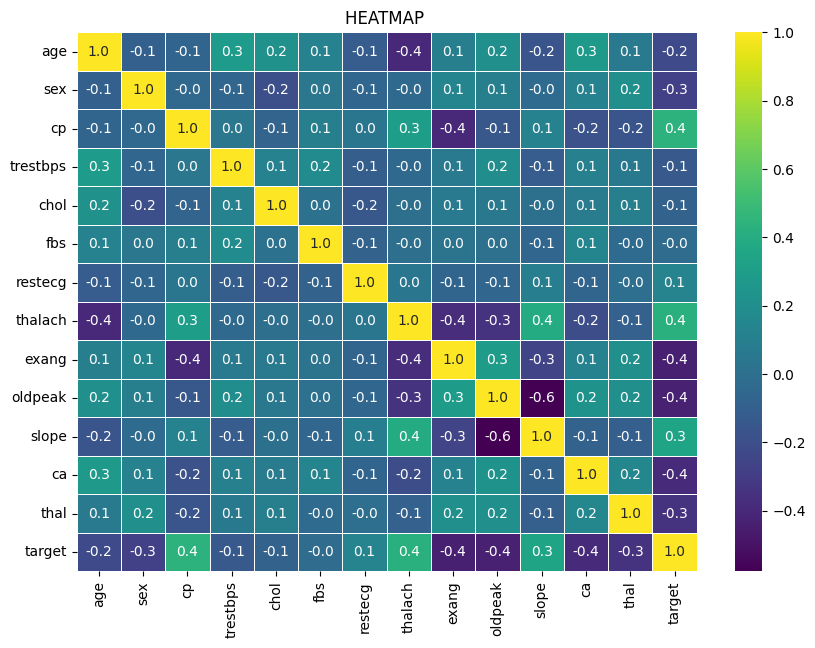

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True,cmap='viridis',fmt=".1f",linewidths=0.6)
plt.title('HEATMAP ')
plt.show()

In [16]:
trestbp=hd_data['trestbps']
chol=hd_data['chol']

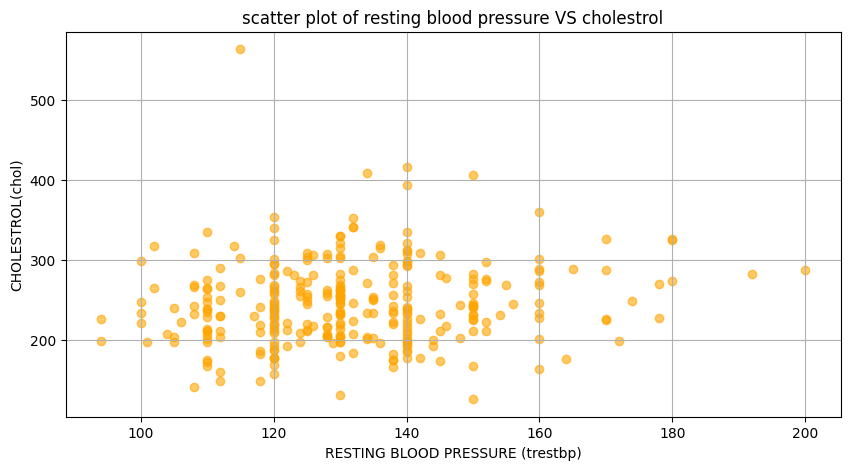

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(trestbp,chol,alpha=0.6,color='orange')
plt.title('scatter plot of resting blood pressure VS cholestrol')
plt.xlabel('RESTING BLOOD PRESSURE (trestbp)')
plt.ylabel('CHOLESTROL(chol)')
plt.grid(True)
plt.show()

SPLITTING THE DATA 

In [18]:
hd_data['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [19]:
X=hd_data.drop('target',axis=1)
y=hd_data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [22]:
print(X.shape,X_train.shape,X_test.shape,X_val.shape)

(303, 13) (217, 13) (61, 13) (25, 13)


MODEL TRAINING
using logistic regression for binary classification


In [23]:
model=LogisticRegression()
# model={'KNN':KNeighborsClassifier(),
#         'Random Forest':RandomForestClassifier(),
#         'LogisticRegression':LogisticRegression()}

# def fit_score(model,X_train,X_test,y_train,y_test):
#     np.random.seed(7)
#     model_score={}

#     for name,model in model.items():
#         model.fit(X_train,y_train)
#         model_score[name]=model.score(X_test,y_test)
#     return model_score


In [24]:
model.fit(X_train,y_train)

# model_score=fit_score(model=model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
# model_score


c:\Users\A222\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation


In [25]:
# accuracy on training
X_train_predic=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predic,y_train)

In [26]:
print("accuracy: ", training_data_accuracy*(100))

accuracy:  84.33179723502305


In [27]:
# accuracy testing
X_test_predic=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_predic,y_test)

In [28]:
print("testing accuracy : ",testing_data_accuracy)

testing accuracy :  0.8852459016393442


validating the system 


building the predictive system


In [29]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_data_numpy=np.asarray(input_data)

ip_Data_reshaping=input_data_numpy.reshape(1,-1)

prediction=model.predict(ip_Data_reshaping)
print(prediction)



if(prediction[0]==0):
    print("The person doesn not have a heart disease!")
else:
    print("The person have a heart defect refer to the doctor immediately! ")

[1]
The person have a heart defect refer to the doctor immediately! 


c:\Users\A222\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
